In [20]:
import pandas_datareader.data as reader
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as ts
import statistics
import yfinance as yf
import datetime as dt

In [21]:
# df = pd.read_csv('Data/AAPL.csv')
# df = pd.read_csv('Data/DIS.csv')
# start_date = dt.date(2023,1,1)
# end_date = dt.date(2024,7,1)
start_date = "2023-01-01"
end_date = "2024-07-01"
df = yf.download('AAPL', interval='1d', start=start_date, end=end_date)['Close']
df = pd.DataFrame(df)
# df.index =df.index.astype(str)
# df = df.set_index('Date')
# risk_free_rate = pd.read_csv('data/^TNX.csv')
# risk_free_rate = pd.read_csv('data/^TNX.csv')
# risk_free_rate = risk_free_rate.set_index('Date')

ff_factors = pd.read_csv('data/famafrench_daily_factor.csv')
# ff_factors = reader.DataReader('Data/famafrench_monthly_factor.csv', start_date, end_date)
# ff_factors = pd.read_csv('Data/famafrench_monthly_factor.csv')
ff_factors.drop(['Date_str'], axis=1, inplace=True)
ff_factors = ff_factors.set_index('Date')
ff_factors.index = pd.to_datetime(ff_factors.index)


[*********************100%%**********************]  1 of 1 completed


In [22]:
# df = df.join(risk_free_rate['Adj Close'], rsuffix=' Risk Free')

In [23]:
df.head()

,Close
Date,
2023-01-03,125.070000
2023-01-04,126.360001
2023-01-05,125.019997
2023-01-06,129.619995
2023-01-09,130.149994


In [24]:
# YEAR_DAYS = 252
# df['Daily_return'] = np.log(df['Adj Close']/df['Adj Close'].shift(1))
# df['Daily_return'].fillna(0, inplace=True)
# df['Excess_return'] = ((df['Daily_return'].rolling(window=YEAR_DAYS).mean() * YEAR_DAYS).apply(lambda x: np.exp(x)) - 1) - df['Adj Close Risk Free']/100

In [25]:
YEAR_DAYS = 250
daily_returns = df['Close'].pct_change().dropna()
yearly_returns = df['Close'].pct_change(periods=1) # daily
# monthly_returns = df['Adj Close'].pct_change(periods=1) # monthly
# monthly_returns = monthly_returns.resample('M').agg(lambda x: (x+1).prod() - 1)
# df['Excess_return'] = ((daily_returns.diff(window=YEAR_DAYS).mean() + 1) ** YEAR_DAYS - 1) - df['Adj Close Risk Free']/100
# df['Excess_return'] = yearly_returns -  df['Adj Close Risk Free']/100

In [26]:

# monthly_returns = df['Close'].pct_change(periods=1) # monthly return
# monthly_returns = monthly_returns.resample('M').agg(lambda x: (x+1).prod() - 1)
# # df['Monthly_return'] = monthly_returns
# monthly_returns = monthly_returns[1:]

In [27]:
# data = pd.DataFrame().join(ff_factors).dropna()

In [28]:
df = df.join(ff_factors)

# monthly_returns.index = ff_factors.index

In [29]:
df['Excess_return'] = yearly_returns - df['RF']
df.dropna(inplace=True)

In [30]:
from sklearn.linear_model import LinearRegression
start_date = '2023-01-03'
end_date = '2024-01-01'
# X = df.loc[start_date:end_date][['Mkt-RF', 'SMB', 'HML']]/100
# y = df.loc[start_date:end_date]['Excess_return']
X = df[['Mkt-RF', 'SMB', 'HML']].dropna()
y = df['Excess_return']
ff_three_factors_model = LinearRegression().fit(X, y)
ff_three_factors_model.score(X, y)

0.45138306660591143

In [31]:
# test_start = '2023-01-04'
# test_end = '2024-03-01'
# X_test = df.loc[test_start : test_end][['Mkt-RF', 'SMB', 'HML']]/100
# y_test = df.loc[test_start : test_end]['Excess_return']
# print('R^2 score: {}'.format(ff_three_factors_model.score(X_test, y_test)))

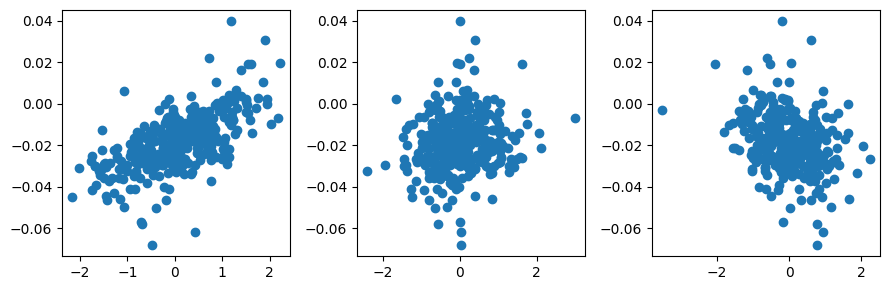

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))
for i, feature in enumerate(list(X.columns)):
    axes[i].scatter(X[feature], y)
fig.tight_layout()

In [33]:
X.columns

Index(['Mkt-RF', 'SMB', 'HML'], dtype='object')

In [34]:
import statsmodels.api as sm
X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Excess_return   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     95.99
Date:                Sun, 28 Jul 2024   Prob (F-statistic):           2.38e-45
Time:                        15:28:39   Log-Likelihood:                 1128.4
No. Observations:                 354   AIC:                            -2249.
Df Residuals:                     350   BIC:                            -2233.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0194      0.001    -36.046      0.000      -0.020      -0.018
Mkt-RF         0.0101      0.001     14.495      0.000       0.009       0.011
SMB           -0.0007      0.001     -0.866      0.387      -0.002       0.001
HML           -0.0044      0.001     -5.828      0.000      -0.006      -0.003
==============================================================================
Omnibus:                       34.875   Durbin-Watson:                   1.695
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.898
Skew:                          -0.037   Prob(JB):                     3.17e-40
Kurtosis:                       6.511   Cond. No.                         1.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""